In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('datasets/Social_Network_Ads.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
# implementation
X = df[['Age','EstimatedSalary']]
y= df['Purchased']

In [5]:
sX = StandardScaler()
x = sX.fit_transform(X)

In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=.3, random_state = 0)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
clf = KNeighborsClassifier(n_neighbors=5) # neighbors = 5 default
clf.fit(xtrain, ytrain)

KNeighborsClassifier()

In [9]:
clf.score(xtest,ytest) * 100

91.66666666666666

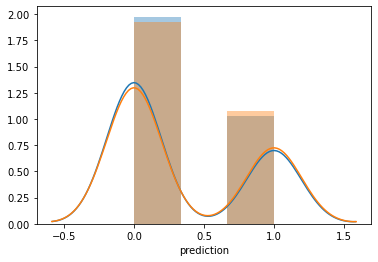

In [10]:
ypred = clf.predict(xtest)
data = np.concatenate([ytest.values.reshape(-1,1), ypred.reshape(-1,1)],axis=1)
results = pd.DataFrame(data,columns=['orignal','prediction'])
sns.distplot(results['orignal'],)
sns.distplot(results['prediction'],)
plt.show()

In [11]:
df['predictions'] = clf.predict(x)
fig = px.scatter(
                    df, 
                    x='Age',
                    y='EstimatedSalary',
                    color='predictions',
                    title='age/salary grps',)
fig.show()

In [15]:
ypred = clf.predict(x)

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
confusion_matrix(y,ypred)

array([[236,  21],
       [ 10, 133]], dtype=int64)

In [19]:
(236+133) /400 # score

0.9225

In [20]:
(10 + 21) / 400 # error rate

0.0775